# Exercise 7 | Principle Component Analysis and K-Means Clustering



In [144]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
from imageio import imread
from mpl_toolkits.mplot3d import Axes3D
# Initialization
from ex7_pcafunc import *
from ex7func import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Load Example Dataset
We start this exercise by using a small dataset that is easily to
visualize



Visualizing example dataset for PCA.




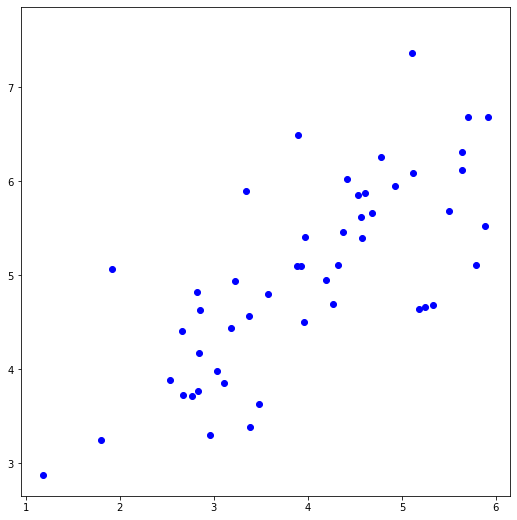

In [145]:
print('Visualizing example dataset for PCA.\n\n')
data = scio.loadmat('ex7data1.mat')
X=data['X']
# Visualize the example dataset
plt.figure()
plt.plot(X[:, 0],X[:, 1], 'bo')
plt.axis([0.5,6.5,2,8])
plt.axis('square')
plt.show()

## Part 2: Principal Component Analysis
You should now implement PCA, a dimension reduction technique. You
should complete the code in pca.m



Running PCA on example dataset.




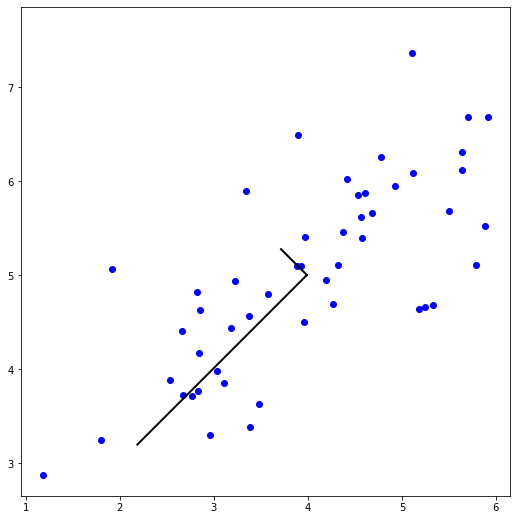

In [146]:
print('\nRunning PCA on example dataset.\n\n')
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
plt.figure()
plt.plot(X[:, 0],X[:, 1], 'bo')
plt.axis([0.5,6.5,2,8])
plt.axis('square')
drawLine(mu, mu + 1.5 * S[0] * U[:,0],'-k',linewidth=2)
drawLine(mu, mu + 1.5 * S[1] * U[:,1],'-k',linewidth=2)
plt.show()

## Part 3: Dimension Reduction
You should now implement the projection step to map the data onto the
first k eigenvectors. The code will then plot the data in this reduced
dimensional space.  This will show you what the data looks like when
using only the corresponding eigenvectors to reconstruct it.


Dimension reduction on example dataset.


Projection of the first example: 1.481274


(this value should be about 1.481274)


Approximation of the first example: -1.047419 -1.047419


(this value should be about  -1.047419 -1.047419)




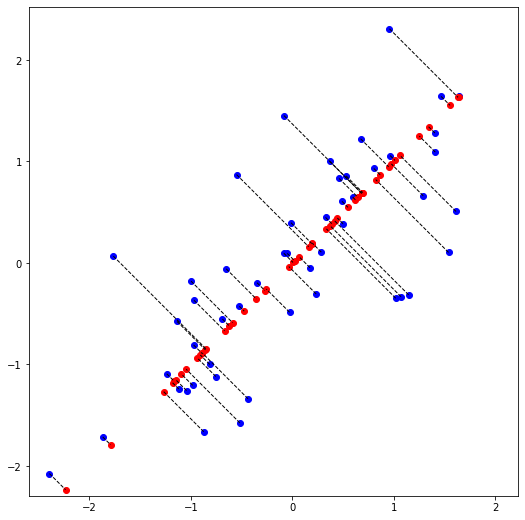

In [147]:
print('\nDimension reduction on example dataset.\n\n')
plt.figure()
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.axis([-4,3,-4,3])
plt.axis('square')
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: %f\n'% Z[0])
print('\n(this value should be about 1.481274)\n\n')
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: %f %f\n' % (X_rec[0,0], X_rec[0,1]))
print('\n(this value should be about  -1.047419 -1.047419)\n\n')
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro')
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i,:], X_rec[i,:], '--k', linewidth=1)
plt.show()

## Part 4: Loading and Visualizing Face Data
We start the exercise by first loading and visualizing the dataset.
The following code will load the dataset into your environment


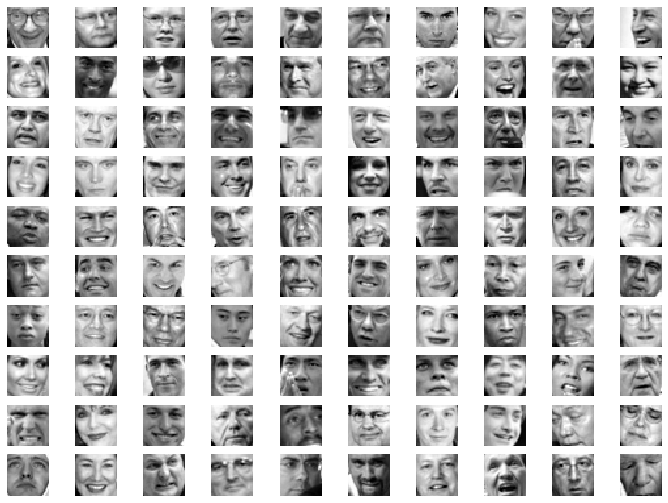

In [148]:
data = scio.loadmat('ex7faces.mat')
X=data['X']
displayData(X[0:100,:])


##  Part 5: PCA on Face Data: Eigenfaces
Run PCA and visualize the eigenvectors which are in this case eigenfaces
We display the first 36 eigenfaces.


Running PCA on face dataset.
(this might take a minute or two ...)




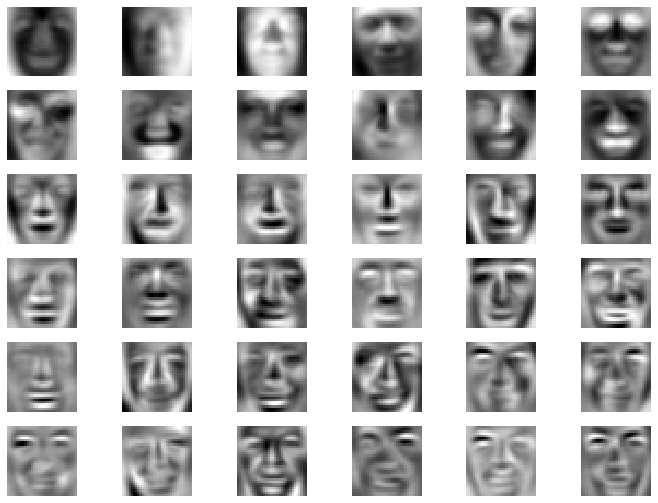

In [149]:
print('\nRunning PCA on face dataset.\n(this might take a minute or two ...)\n\n')
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
displayData(U[:, 0:36].T)

##  Part 6: Dimension Reduction for Faces
Project images to the eigen space using the top k eigenvectors
If you are applying a machine learning algorithm

In [150]:
print('\nDimension reduction for face dataset.\n\n')
K = 100
Z = projectData(X_norm, U, K)
print('The projected data Z has a size of: ')
print(Z.shape)


Dimension reduction for face dataset.


The projected data Z has a size of: 
(5000, 100)


## Part 7: Visualization of Faces after PCA Dimension Reduction
Project images to the eigen space using the top K eigen vectors and
visualize only using those K dimensions
Compare to the original input, which is also displayed


Visualizing the projected (reduced dimension) faces.




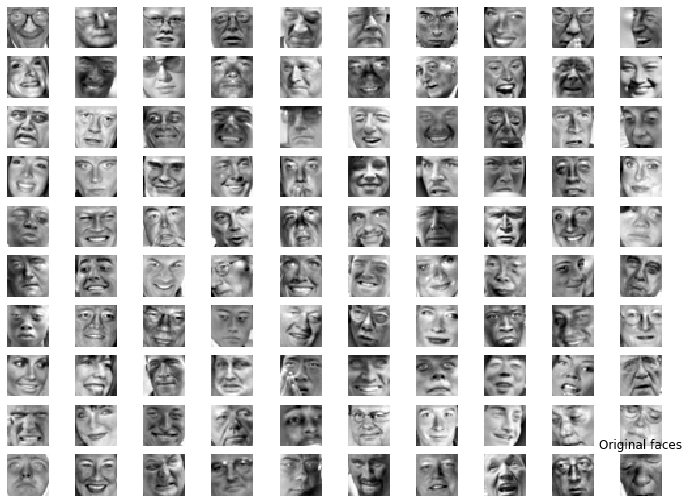

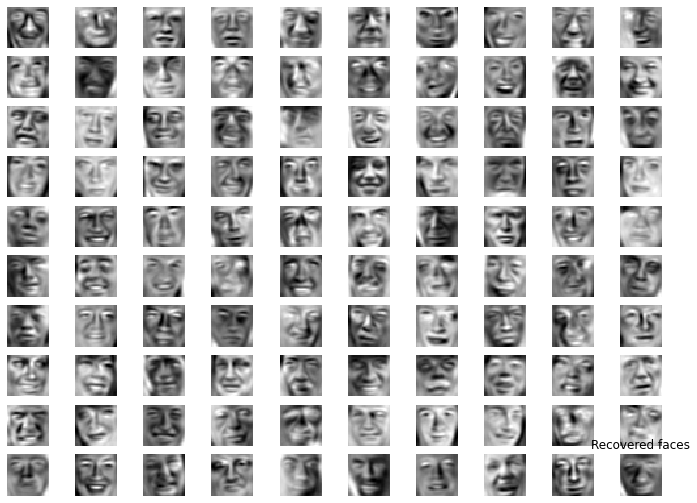

In [151]:
print('\nVisualizing the projected (reduced dimension) faces.\n\n')
K = 100
X_rec  = recoverData(Z, U, K);

# Display normalized data
displayData(X_norm[0:100,:])
plt.title('Original faces')
plt.show()
# Display reconstructed data from only k eigenfaces
displayData(X_rec[0:100,:])
plt.title('Recovered faces')
plt.show()

## Part 8(a): Optional (ungraded) Exercise: PCA for Visualization
One useful application of PCA is to use it to visualize high-dimensional
data. In the last K-Means exercise you ran K-Means on 3-dimensional
pixel colors of an image. We first visualize this output in 3D, and then
apply PCA to obtain a visualization in 2D.

In [152]:
A=imread('bird_small.png')
A =np.array(A / 255)
X=np.reshape(A,(-1,3),order='F')
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx= runkMeans(X, initial_centroids, max_iters)

K-Means iteration 0/10...

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...



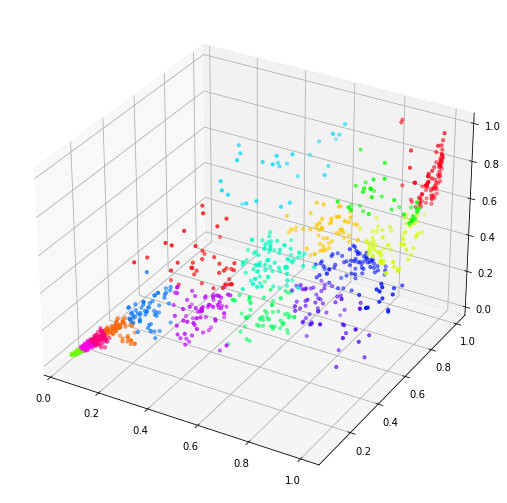

In [167]:
sel = np.floor(np.random.rand(1000, 1) * X.shape[0]).astype(dtype=int)
ax=plt.figure().add_subplot(111,projection='3d')
ax.scatter(X[sel,0],X[sel,1],X[sel,2],s=10,c=idx[sel],cmap='hsv')


## Part 8(b): Optional (ungraded) Exercise: PCA for Visualization
Use PCA to project this cloud to 2D for visualization

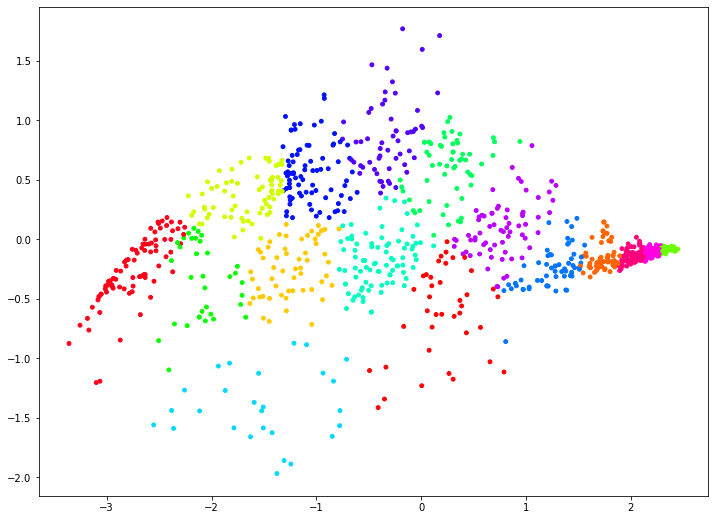

In [168]:
X_norm, mu, sigma = featureNormalize(X)
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)
plotDataPoints(Z[sel[:,0], :], idx[sel], K)